In [130]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sf
from IPython import display
import math as mt
import matplotlib.cm as cm    
import matplotlib.animation as animation
import xarray as xr
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
def rmse(y1, y2):                                                                                                                                                                                   
    return np.sqrt(((y1-y2)**2)).mean() 
ds=myfuncts.load_5d()

pred0=rmse(ds[-1,1,:,:],0*ds[-1,1,:,:])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


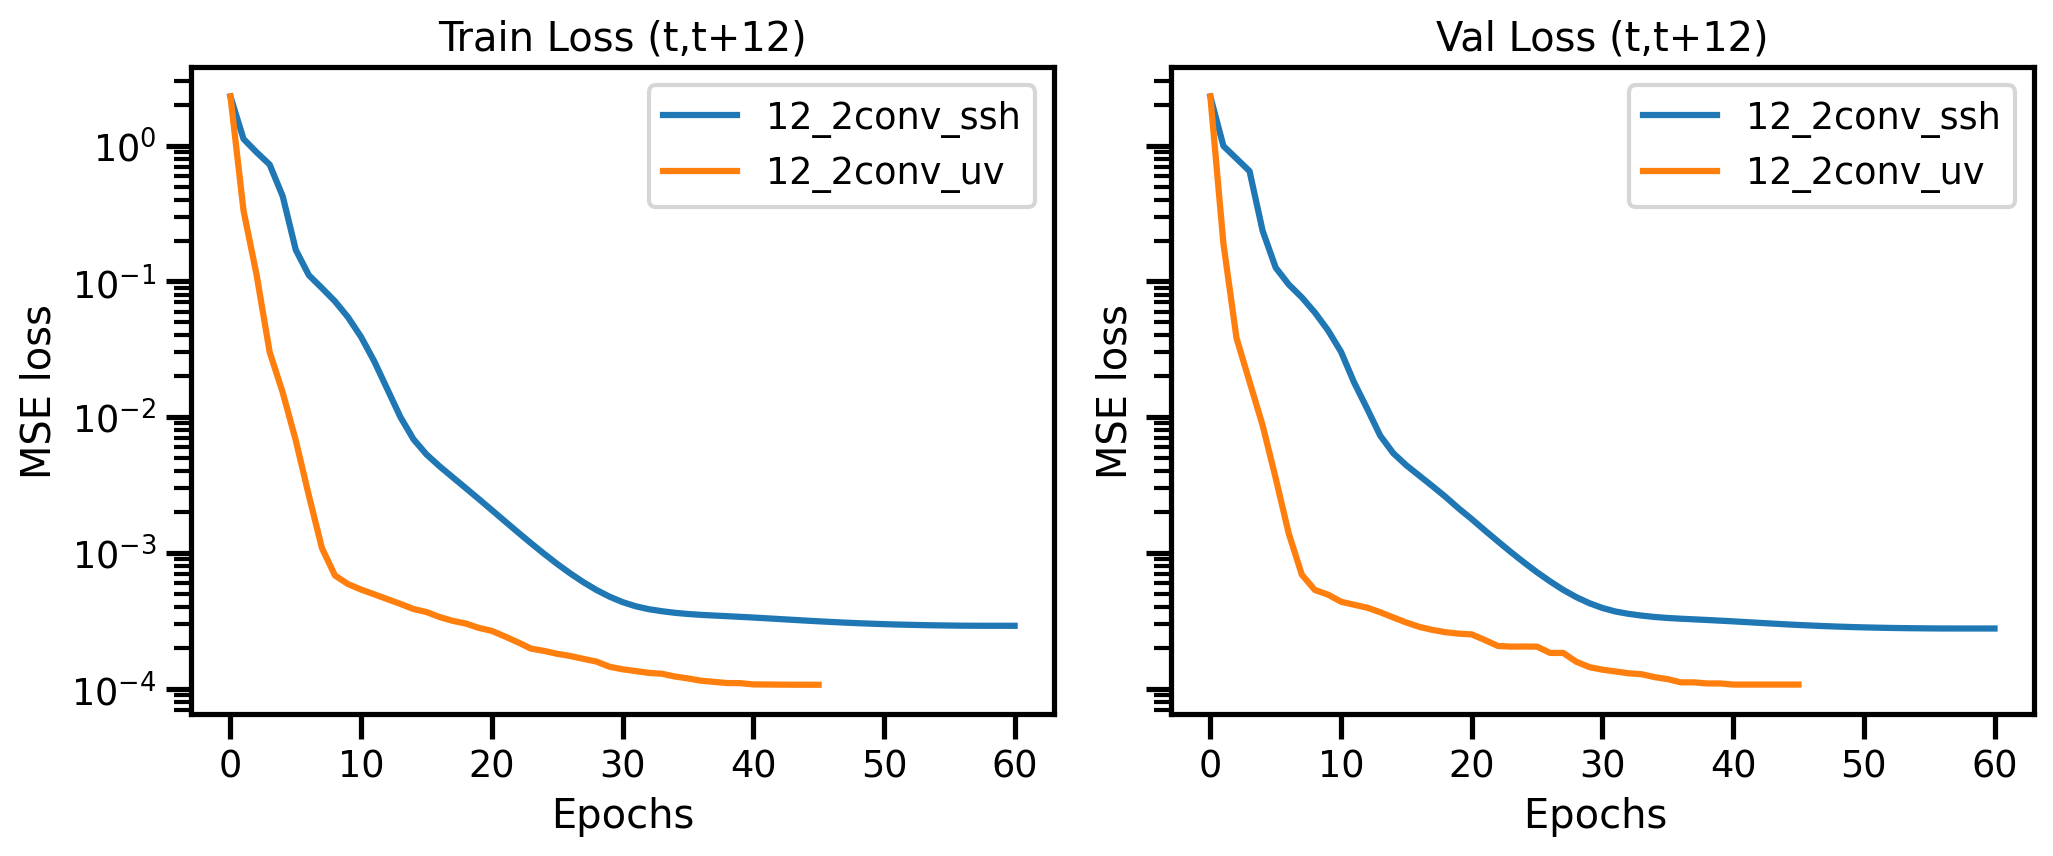

2.719408912070574

In [138]:
import myfuncts 

sims=myfuncts.load_sims5_4()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)
        #print(sim.name +' :', sim.tloss[29])
        
#ax2.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
#ax1.plot(((pred0+0*sim.tloss)/norm),'k--',label='pred0')
ax1.title.set_text('Train Loss (t,t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss (t,t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')
ax2.legend()



plt.tight_layout()
plt.show()
sims[0].tloss[-1]/sims[1].tloss[-1]

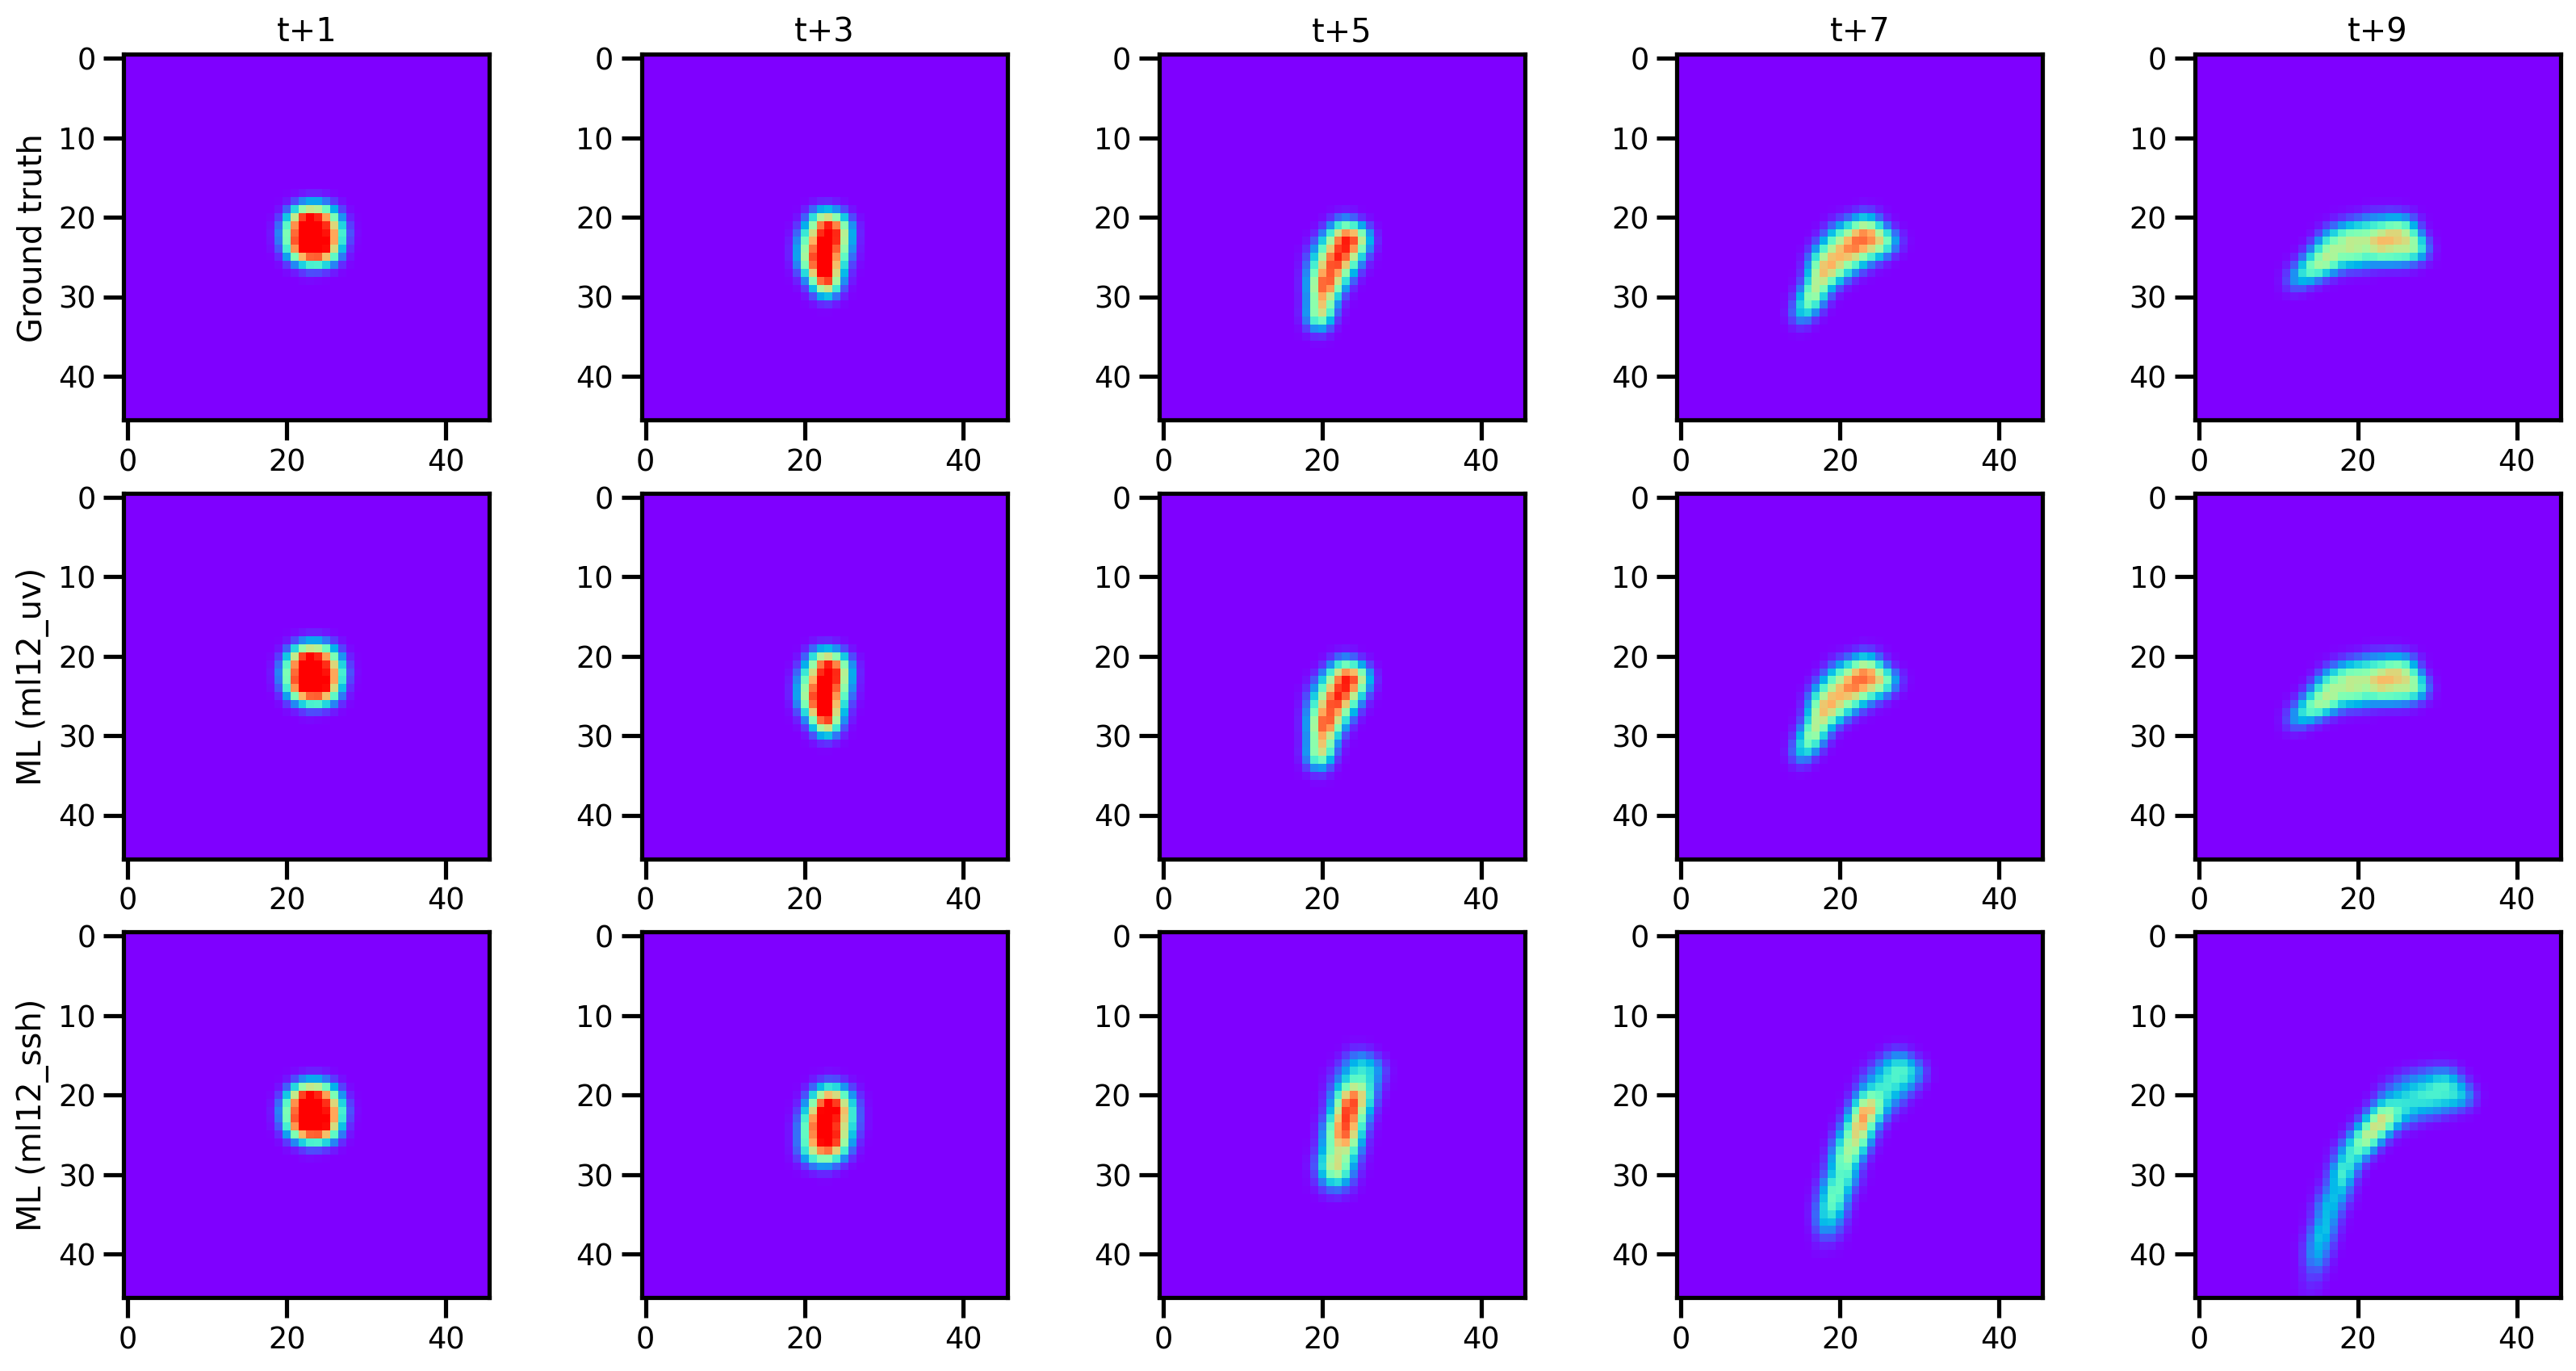

In [132]:
import myfuncts 


gt, ml12, ssh  =myfuncts.load_sshres()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20,10))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    # axs[0,j].imshow(gt[i],cmap=cm.rainbow, vmin=0, vmax=vm)
    # axs[1,j].imshow(ml12[i],cmap=cm.rainbow, vmin=0, vmax=vm)
    # axs[2,j].imshow(ssh[i],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ml12[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_uv)')
axs[2,0].set_ylabel('ML (ml12_ssh)')
plt.show()